In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", "use_inf_as_na")
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import random
from tensorflow.keras import models, Model
from tensorflow.keras.layers import LSTM, Input, GRU, SimpleRNN, Bidirectional, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score

In [47]:
df = pd.read_csv('./data-kiem-tra-1.csv', encoding='latin-1', sep=',')

- Biến đổi cột 'date' từ type là object sang datetime

In [51]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [52]:
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
0,2013-01-02,0,59,22154,999.00,1
1,2013-01-03,0,25,2552,899.00,1
2,2013-01-05,0,25,2552,899.00,-1
3,2013-01-06,0,25,2554,1709.05,1
4,2013-01-15,0,25,2555,1099.00,1
...,...,...,...,...,...,...
481817,2013-05-03,4,37,2437,799.00,1
481818,2013-05-22,4,37,2436,799.00,1
481819,2013-05-03,4,37,2436,799.00,1
481820,2013-05-18,4,37,2416,449.00,1


- Loại bỏ những giá trị bị lặp lại theo ngày

In [ ]:
df = df.drop_duplicates(subset=['date'])

In [73]:
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
85124,2013-01-01,0,54,11562,299.0,1
94910,2013-01-02,0,52,8960,399.0,1
103679,2013-01-03,0,44,3851,899.0,1
38508,2013-01-04,0,0,9598,426.0,1
24220,2013-01-05,0,26,20256,149.0,1
...,...,...,...,...,...,...
452238,2013-05-27,4,21,20216,549.0,1
443911,2013-05-28,4,26,14261,249.0,1
441711,2013-05-29,4,28,7894,1490.0,1
480038,2013-05-30,4,35,1937,599.0,1


- Sort giá trị theo ngày

In [91]:
df = df.sort_values(by='date')
df.index = np.arange(1, len(df)+1)

In [92]:
df

,date,truong_1,truong_2,truong_3,truong_4,truong_5
1,2013-01-01,0,54,11562,299.0,1
2,2013-01-02,0,52,8960,399.0,1
3,2013-01-03,0,44,3851,899.0,1
4,2013-01-04,0,0,9598,426.0,1
5,2013-01-05,0,26,20256,149.0,1
...,...,...,...,...,...,...
147,2013-05-27,4,21,20216,549.0,1
148,2013-05-28,4,26,14261,249.0,1
149,2013-05-29,4,28,7894,1490.0,1
150,2013-05-30,4,35,1937,599.0,1


- Dữ liệu sau khi đã xóa các trùng lặp về thời gian chỉ gồm 151 mẫu dữ liệu

- Biểu đồ heatmap thể hiện sự tương quan giữa các đặc trưng của dữ liệu

In [76]:
columns = ['truong_1', 'truong_2', 'truong_3', 'truong_4', 'truong_5']

In [77]:
data = df[columns]

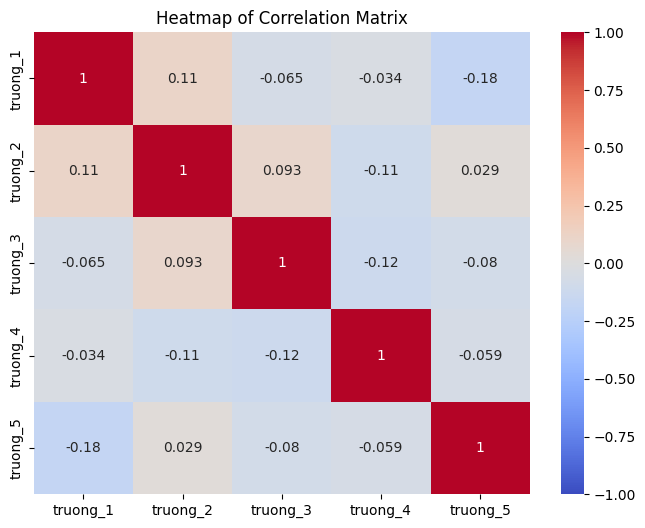

In [78]:
correlation_matrix = data.corr()

# Vẽ biểu đồ heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

- Theo như biểu đồ thì các trường không cho thấy có sự tương quan mạnh với nhau

- Biểu đồ thể hiện các giá trị của trường 1

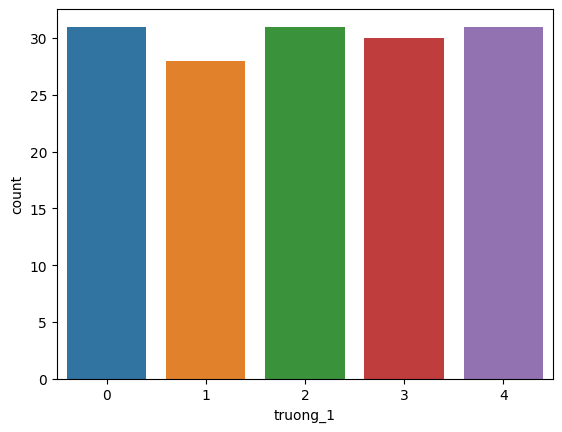

In [87]:
sns.countplot(data=data, x='truong_1');

- Biều đồ thể hiện các giá trị của trường 2 theo thời gian

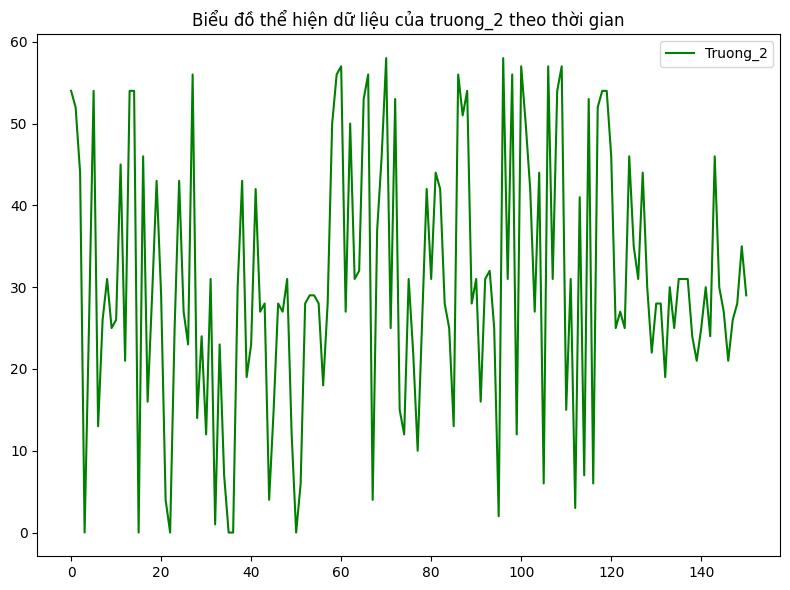

In [88]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_2'].shape[0]), data['truong_2'], 'green', label='Truong_2')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_2 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

- Biều đồ thể hiện các giá trị của trường 3 theo thời gian

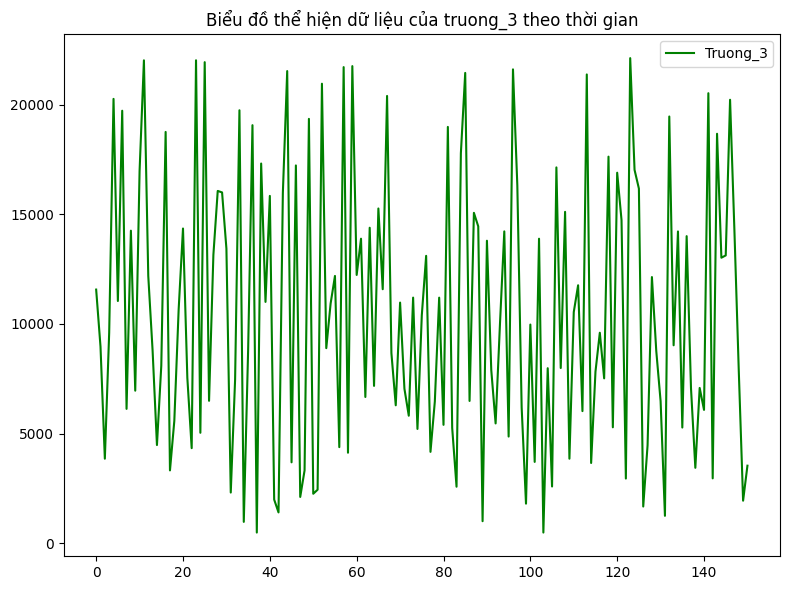

In [80]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_3'].shape[0]), data['truong_3'], 'green', label='Truong_3')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_3 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

- Biều đồ thể hiện các giá trị của trường 4 theo thời gian

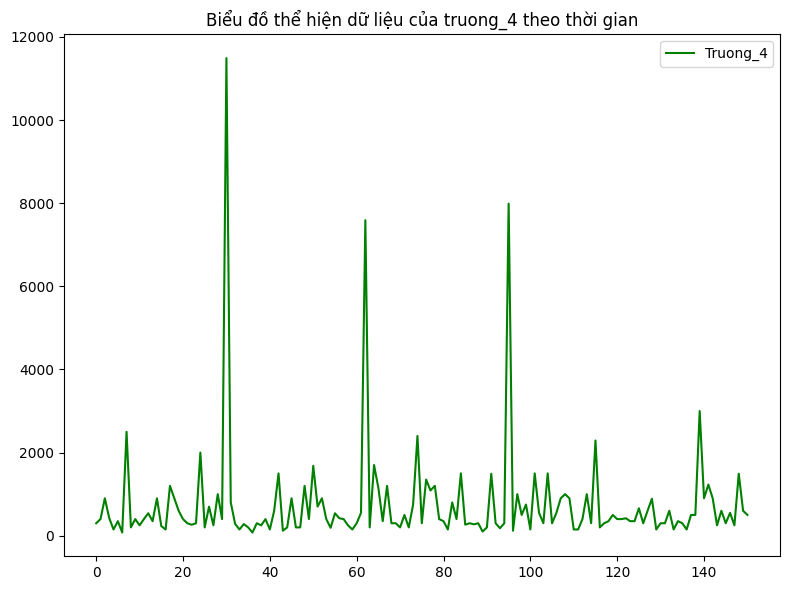

In [89]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_4'].shape[0]), data['truong_4'], 'green', label='Truong_4')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_4 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

- Biều đồ thể hiện các giá trị của trường 5 theo thời gian

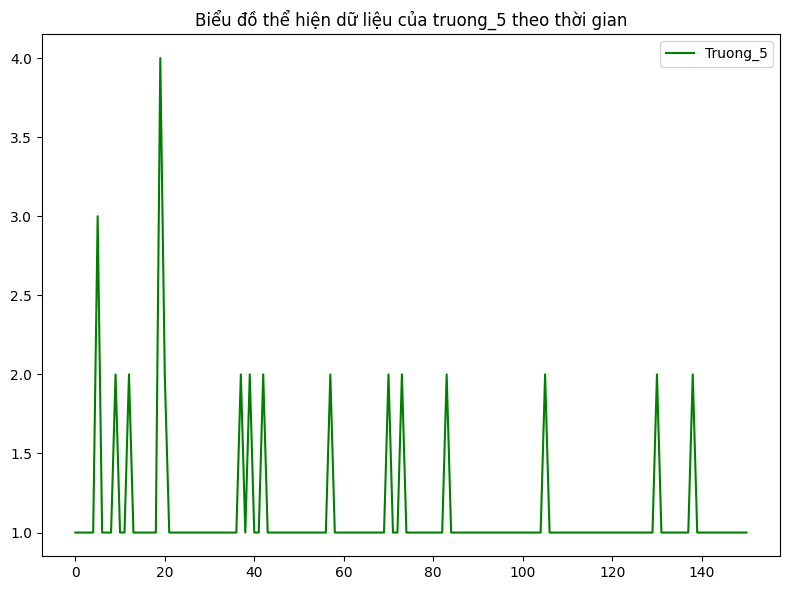

In [90]:
plt.figure(figsize=(8, 6))

plt.plot(range(data['truong_5'].shape[0]), data['truong_5'], 'green', label='Truong_5')
plt.title(f'Biểu đồ thể hiện dữ liệu của truong_5 theo thời gian')
plt.legend()

plt.tight_layout()
plt.show()

## 1. Sử dụng mô hình RNN + LSTM

In [206]:
# Sử dụng test size = 50
TEST_SIZE = 50

- Đánh giá mô hình qua 4 độ đo:
    + R2: Đánh giá mức độ tốt của mô hình hồi quy
    + RMSE: Đánh giá biên độ dao động giữa giá trị dự báo xung quanh giá trị thực tế
    + MAE: Trung bình sai số giữa giá trị dự báo và giá trị thực tế
    + MAPE: Phần trăm lỗi giữa giá trị dự đoán và giá trị thực tế

In [188]:
def measure_metric(y_true, y_pred):
    e = y_true - y_pred
    r2=r2_score(y_true, y_pred)
    mse=np.mean(e**2)
    rmse=np.sqrt(mse)
    mae=np.mean(np.abs(e))
    mape = mean_absolute_percentage_error(y_true, y_pred)

    print('R2: {}'.format(r2))
    print('MSE: {}'.format(mse))
    print('RMSE: {}'.format(rmse))
    print('MAE: {}'.format(mae))
    print('MAPE: {}'.format(mape))
    return [r2, mse, rmse, mae, mape]

In [189]:
dict_single_step = {
    'R2': [],
    'MSE': [],
    'RMSE': [],
    'MAE': [],
    'MAPE': []
}

In [190]:
metric_df_single_step = pd.DataFrame(dict_single_step)

In [207]:
class SingleStep:
    
    def __init__(self, data: pd.DataFrame, look_back=10):
        """
        Tham số:
            data (pd.DataFrame): Dữ liệu
            mapping_steps (int): Số lượng thời gian look back
        """
        # Lưu dữ liệu thành array thay vì DataFrame
        self.df = data.copy()
        self.data = self.df.values

        # Scaler dữ liệu
        self.scaler = StandardScaler()
        self.normalized_data = self.scaler.fit_transform(self.data)
        
        # Số lượng mẫu trong tập dữ liệu
        self.time_steps = data.shape[0] 
        
        # Số lượng đặc trưng
        self.n_columns = data.shape[1]

        # Số lượng ngày để dự đoán look_back -> output 
        self.look_back = look_back

    def data_mapping(self):
        """
        Chuyển từ 2D array sang 3D array để fit vào mô hình
        Với mỗi chuỗi có look_back thời gian tương ứng với số ngày trong bộ dữ liệu 
    
        Tham số:
            look_back (int): Số lượng thời gian cho từng chuỗi.
    
        Trả về:
            1 Array 3D với shape (mapping_iterations, look_back, n_columns).
        """
        mapping_steps = self.look_back + 1
        
        iterations = self.time_steps - mapping_steps + 1
        self.normalized_data_mapped = np.empty((iterations, mapping_steps, self.n_columns))
        
        for i in range(iterations):
            self.normalized_data_mapped[i, :, :] = self.normalized_data[i:i + mapping_steps, :]
        
        return self.normalized_data_mapped
    
    def train_test_split(self, test_size):
        """
        Chia tập dữ liệu thành tập train và test.
        
        Tham số:
            test_size (int): Số lượng quan sát thời gian cho tập test.
        
        Trả về:
            tuple: X_train, X_test, y_train, y_test
        """
        self.test_size = test_size
        self.train_size = self.normalized_data_mapped.shape[0] - self.test_size
        
        # normalized_data_mapped đã chứa số look_back+1 nên chỉ việc lấy look_back ở phần trước cho tập train và để lại giá trị cuối cùng là của tập test
        X_train = self.normalized_data_mapped[:self.train_size, :-1, :]
        y_train = self.normalized_data_mapped[:self.train_size, -1, :]
        
        X_test = self.normalized_data_mapped[self.train_size:, :-1, :]
        y_test = self.normalized_data_mapped[self.train_size:, -1, :]
        
        return X_train, X_test, y_train, y_test  

    def forecast_n_steps(self, model, data: pd.DataFrame, n_forecast_steps=15):
        """
        Dự đoán nhiều điểm dữ liệu tiếp theo bằng cách từ model dự đoán 1 step. Bỏ dữ liệu ban đầu từ chuỗi look back sau đó đưa dữ liệu vừa dự đoán
        vào cuối của chuỗi look back để dự đoán tiếp theo. Lặp lại cho đến khi dự đoán được đủ n_forecast_steps
    
        Tham số:
            model: Mô hình để dự đoán.
            data: 1 chuỗi look back bất kì để phán đoán step tiếp theo của look back.
            n_forecast_steps: Số lượng step được dự đoán tiếp sau chuỗi look back.
    
        Trả về:
            np.array: 1 tập n_forecast_steps đã dự đoán.
        """
        # Scaling dữ liệu của chuỗi look back. last_steps shape = (self.look_back, self.n_columns)
        last_steps = self.scaler.transform(data.values)[-self.look_back:]
    
        # Định nghĩa 1 mẫu dữ liệu để dữ đoán output với shape = (n_forecast_steps, self.look_back, self.n_columns) để có thể fit từng mẫu vào mô hình dự đoán ra output
        normalized_data_mapped = np.empty((n_forecast_steps, self.look_back, self.n_columns))
    
        # Khởi tạo tập dự đoán chứa n_forecast_steps dự đoán từ mô hình
        predictions = np.empty((n_forecast_steps, self.n_columns))
    
        # Dự đoán trước 1 step
        normalized_data_mapped[0, :, :] = last_steps
        predictions[0, :] = model.predict(
            normalized_data_mapped[0, :, :].reshape(1, self.look_back, self.n_columns),
            verbose=False
        )
        # Tạo ra n_forecast_steps dự đoán mới từ look back và 1 step đã dự đoán
        for i in range(1, n_forecast_steps):
            # Loại bỏ quan sát ở đầu ra và thêm phán đoán mới vào chuỗi
            normalized_data_mapped[i, :-1, :] = normalized_data_mapped[i - 1, 1:, :]
            normalized_data_mapped[i, -1, :] = predictions[i - 1, :]
    
            # Dự đoán quan sát tiếp theo
            norm_data = normalized_data_mapped[i, :, :].reshape(1, self.look_back, self.n_columns)
            predictions[i, :] = model.predict(norm_data, verbose=False)
    
        # Inverse dữ liệu 
        predictions = self.scaler.inverse_transform(predictions)
        return predictions

- Sử dụng cột truong_3 để dự báo với LSTM

In [208]:
columns = ['truong_3']

In [209]:
# Từ 5 điểm thời gian trước đó dự đoán ra điểm thời gian thứ 6 tiếp theo
look_back = 5

# Fit dữ liệu để setup dữ liệu cho mô hình
data_model = SingleStep(data[columns], look_back)

# Scaled dữ liệu
scaled_data_mapped = data_model.data_mapping()

In [210]:
X_train, X_test, y_train, y_test = data_model.train_test_split(test_size=TEST_SIZE)

In [211]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((96, 5, 1), (50, 5, 1), (96, 1), (50, 1))

- Định nghĩa mô hình

In [212]:
def lstm_single_step_model():
    input = Input(shape=X_train[0].shape)
    x = LSTM(units=64, return_sequences=True)(input)
    x = LSTM(units=32, return_sequences=False)(x)
    x = Dense(units=16, activation='relu')(x)
    output = Dense(units=len(columns))(x)
    
    model = Model(inputs=input, outputs=[output])
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    
    return model

In [213]:
model = lstm_single_step_model()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 5, 1)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 5, 64)          │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

In [214]:
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True)

In [215]:
history = model.fit(X_train, 
                        y_train, 
                        epochs=50, 
                        batch_size=16, 
                        validation_data=(X_test, y_test), 
                        verbose=False,
                        callbacks=[model_checkpoint])

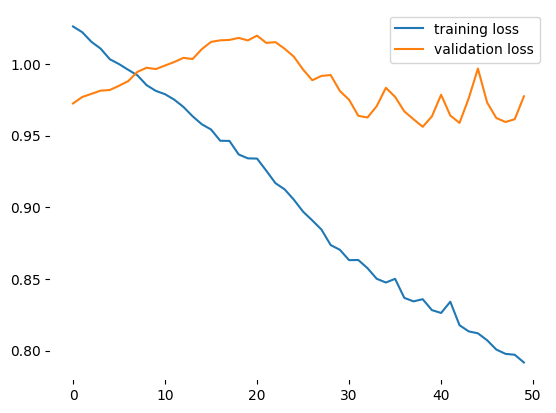

In [216]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()
plt.show()

In [217]:
model = models.load_model('model.keras')

In [218]:
result = model.evaluate(X_test, y_test)
y_pred_model = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9580  
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


- Đánh giá dự đoán của mô hình trên cột truong_3

In [219]:
y_test_actual = data_model.scaler.inverse_transform(y_test)
y_test_pred = data_model.scaler.inverse_transform(y_pred_model)

In [220]:
MAPE = mean_absolute_percentage_error(y_test_pred, y_test_actual)
Accuracy = 1 - MAPE
print(f"Phần trăm sai số giữa giá trị dự báo và giá trị thực tế {MAPE * 100}")
print(f"Độ chính xác của mô hình: {Accuracy * 100}")

Phần trăm sai số giữa giá trị dự báo và giá trị thực tế 54.80450992947428
Độ chính xác của mô hình: 45.19549007052572


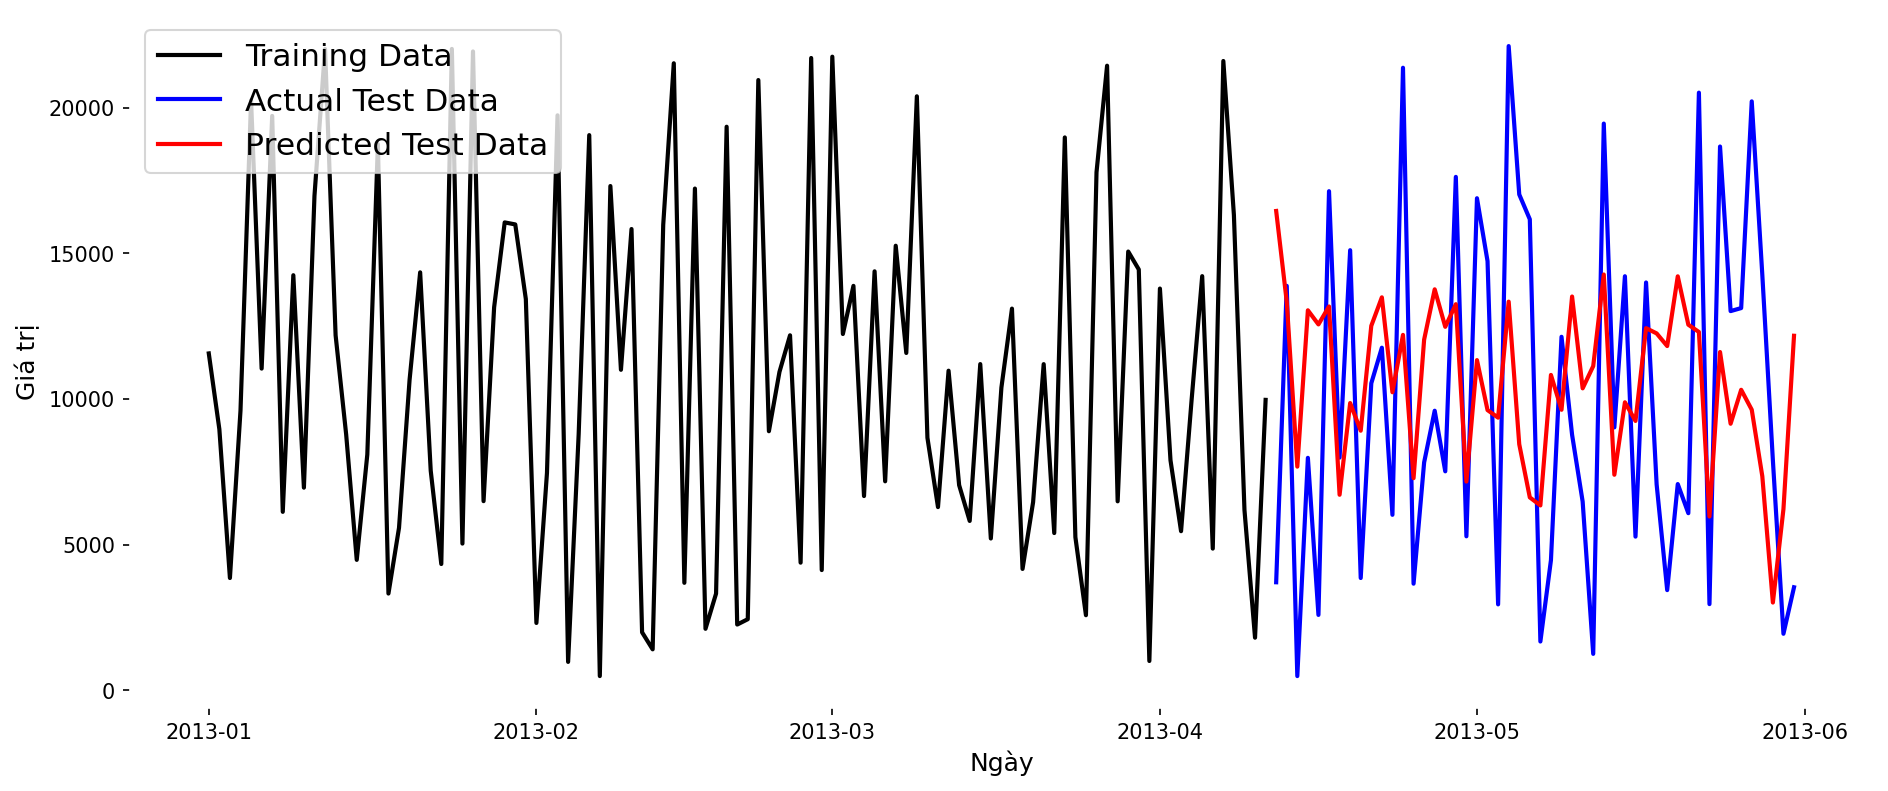

In [221]:
plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes',edgecolor='white')
plt.plot(df['date'].iloc[:-TEST_SIZE], df['truong_3'].iloc[:-TEST_SIZE], color='black', lw=2)
plt.plot(df['date'].iloc[-TEST_SIZE:], y_test_actual, color='blue', lw=2)
plt.plot(df['date'].iloc[-TEST_SIZE:], y_test_pred, color='red', lw=2)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá trị', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

## 2. Sử dụng Kalman để Filter dữ liệu

In [174]:
from pykalman import KalmanFilter

- Sử dụng cột truong_2, truong_3, truong_4 để áp dụng với Kalman filter

In [179]:
columns = ['truong_2', 'truong_3', 'truong_4']

In [180]:
data = df[columns]

In [181]:
kf = KalmanFilter(initial_state_mean=np.zeros(3), 
                  initial_state_covariance=np.eye(3),
                  transition_matrices=np.eye(3),
                  observation_matrices=np.eye(3),
                  transition_covariance=np.eye(3) * 0.1,
                  observation_covariance=np.eye(3) * 0.1)

In [182]:
state_means, state_covariances = kf.filter(np.array(data))

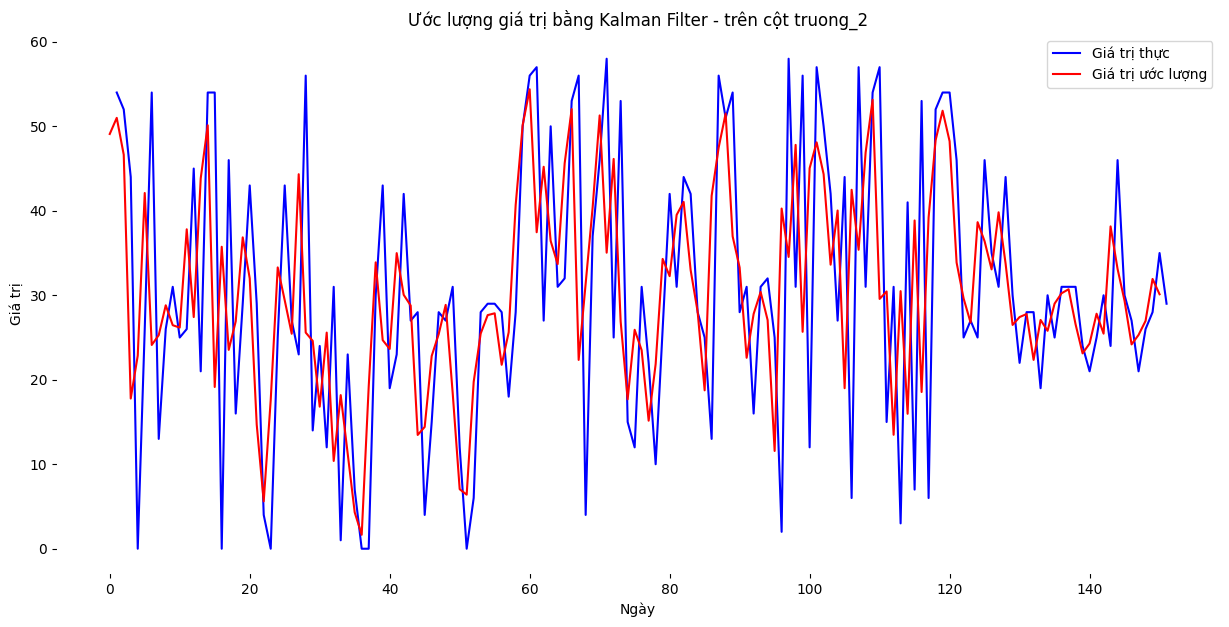

In [183]:
plt.figure(figsize=(15, 7))
plt.plot(data['truong_2'], label='Giá trị thực', color='blue')
plt.plot(state_means[:, 0], label='Giá trị ước lượng', color='red')
plt.legend()
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Ước lượng giá trị bằng Kalman Filter - trên cột truong_2')
plt.show()

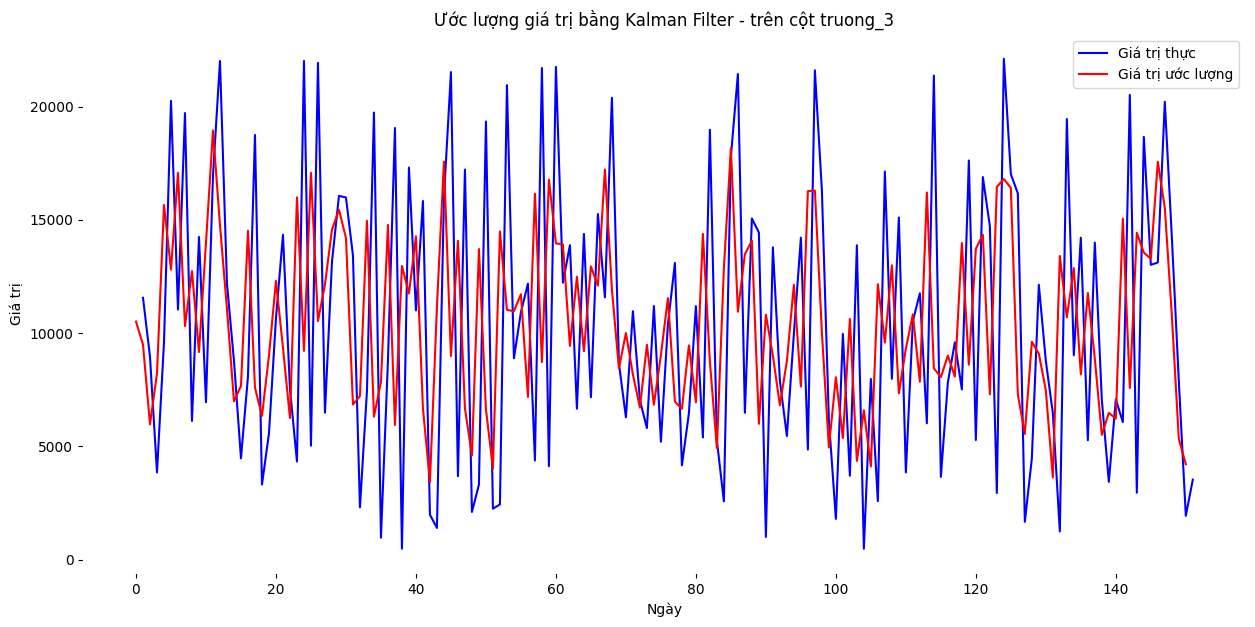

In [184]:
plt.figure(figsize=(15, 7))
plt.plot(data['truong_3'], label='Giá trị thực', color='blue')
plt.plot(state_means[:, 1], label='Giá trị ước lượng', color='red')
plt.legend()
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Ước lượng giá trị bằng Kalman Filter - trên cột truong_3')
plt.show()

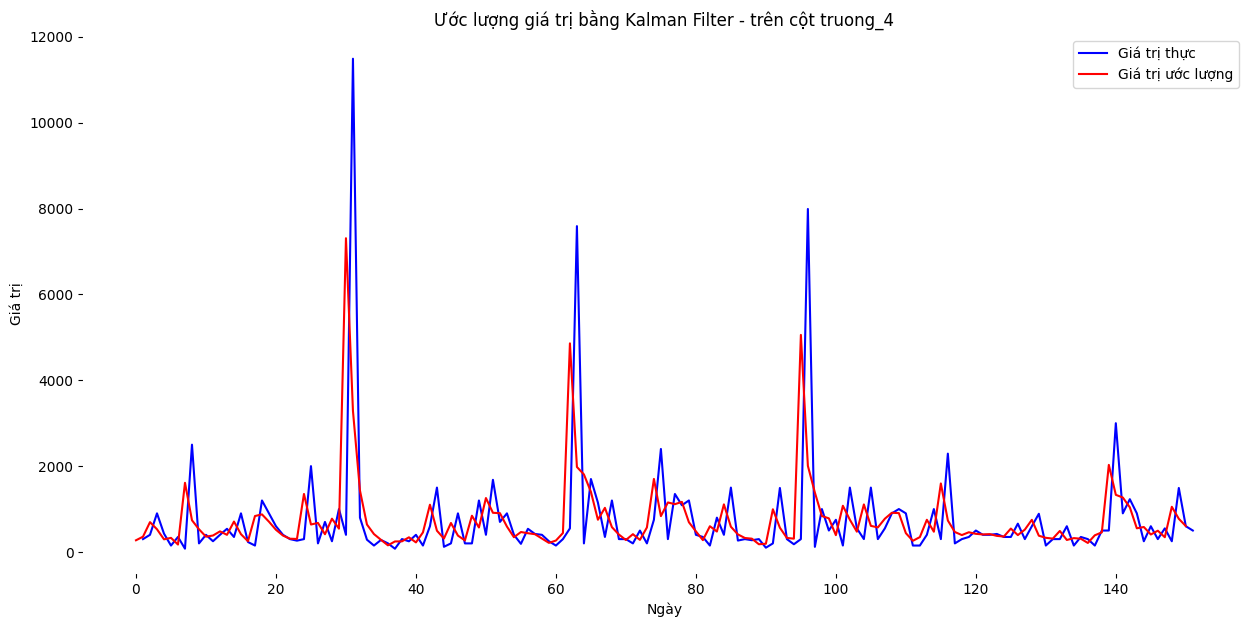

In [186]:
plt.figure(figsize=(15, 7))
plt.plot(data['truong_4'], label='Giá trị thực', color='blue')
plt.plot(state_means[:, 2], label='Giá trị ước lượng', color='red')
plt.legend()
plt.xlabel('Ngày')
plt.ylabel('Giá trị')
plt.title('Ước lượng giá trị bằng Kalman Filter - trên cột truong_4')
plt.show()